<a href="https://colab.research.google.com/github/deepak-kannan7/IPL-Score-Predictor-using-Linear-Regression/blob/main/IPLScorePred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import pickle

In [2]:
df=pd.read_csv("ipl.csv");
df.head(10)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
5,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.5,2,0,0,0,222
6,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,3,0,0.6,3,0,0,0,222
7,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,3,0,1.1,3,0,0,0,222
8,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,7,0,1.2,7,0,4,0,222
9,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,11,0,1.3,11,0,8,0,222


In [3]:
df.shape

(76014, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [5]:
df.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [6]:
df.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


<Axes: >

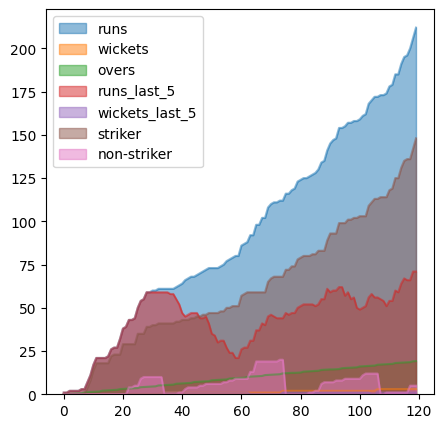

In [7]:
df[['date','venue','bat_team','bowl_team','batsman','bowler','runs','wickets','overs','runs_last_5','wickets_last_5','striker','non-striker']][:120].plot(kind="area",figsize=(5,5), stacked=False)

In [8]:
cols_to_remove=['mid','venue' , 'batsman', 'bowler', 'striker', 'non-striker']
df.drop(labels=cols_to_remove , axis=1 , inplace = True)

In [9]:
df.head(2)

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222


In [10]:
df.shape

(76014, 9)

In [11]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [12]:
consistant_teams=['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals','Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab','Royal Challengers Bangalore', 'Delhi Daredevils','Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad','Rising Pune Supergiants', 'Gujarat Lions','Rising Pune Supergiant']
df=df[(df['bat_team'].isin(consistant_teams)) & (df['bowl_team'].isin(consistant_teams))]
print(df['bat_team'].unique())
print(df['bowl_team'].unique())

['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Deccan Chargers' 'Kings XI Punjab'
 'Royal Challengers Bangalore' 'Delhi Daredevils' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Rising Pune Supergiants'
 'Gujarat Lions' 'Rising Pune Supergiant']
['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Kolkata Knight Riders' 'Rajasthan Royals' 'Mumbai Indians'
 'Chennai Super Kings' 'Deccan Chargers' 'Pune Warriors'
 'Kochi Tuskers Kerala' 'Sunrisers Hyderabad' 'Rising Pune Supergiants'
 'Gujarat Lions' 'Rising Pune Supergiant']


In [13]:
df=df[df['overs']>=5.0]
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [14]:
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56707 entries, 32 to 76013
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            56707 non-null  datetime64[ns]
 1   bat_team        56707 non-null  object        
 2   bowl_team       56707 non-null  object        
 3   runs            56707 non-null  int64         
 4   wickets         56707 non-null  int64         
 5   overs           56707 non-null  float64       
 6   runs_last_5     56707 non-null  int64         
 7   wickets_last_5  56707 non-null  int64         
 8   total           56707 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 4.3+ MB


In [16]:
cat_df = pd.get_dummies(data = df, columns = ['bat_team' , 'bowl_team'])
cat_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Deccan Chargers,bat_team_Delhi Daredevils,...,bowl_team_Kings XI Punjab,bowl_team_Kochi Tuskers Kerala,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Pune Warriors,bowl_team_Rajasthan Royals,bowl_team_Rising Pune Supergiant,bowl_team_Rising Pune Supergiants,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [17]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56707 entries, 32 to 76013
Data columns (total 35 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   date                                   56707 non-null  datetime64[ns]
 1   runs                                   56707 non-null  int64         
 2   wickets                                56707 non-null  int64         
 3   overs                                  56707 non-null  float64       
 4   runs_last_5                            56707 non-null  int64         
 5   wickets_last_5                         56707 non-null  int64         
 6   total                                  56707 non-null  int64         
 7   bat_team_Chennai Super Kings           56707 non-null  uint8         
 8   bat_team_Deccan Chargers               56707 non-null  uint8         
 9   bat_team_Delhi Daredevils              56707 non-null  uint8

In [18]:
X_train = cat_df.drop(labels = 'total', axis = 1)[cat_df['date'].dt.year <= 2016]
X_test = cat_df.drop(labels = 'total', axis = 1) [cat_df['date'].dt.year >= 2017]

y_train = cat_df[cat_df['date'].dt.year <= 2016]['total'].values
y_test = cat_df[cat_df['date'].dt.year >= 2017]['total'].values

In [19]:
print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)

(51366, 34) (51366,)
(5341, 34) (5341,)


In [20]:
X_train.drop(labels='date',axis=True,inplace=True)
X_test.drop(labels='date', axis=True,inplace=True)

In [21]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [22]:
reg.fit(X_train,y_train)

LinearRegression()

In [24]:
prediction = reg.predict(X_test)
print(prediction)

[170.50286882 173.52291238 172.98732743 ... 134.5984261  134.87751141
 128.40537051]


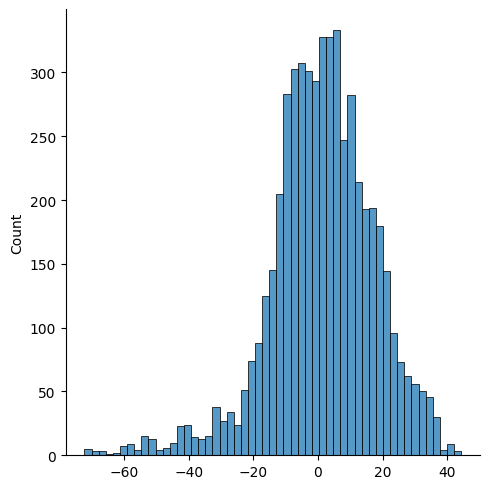

In [25]:
import seaborn as sns
sns.displot(y_test-prediction)

In [28]:
from sklearn import metrics
import numpy as np

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test , prediction))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, prediction))

print('Root Mean Square Error: ', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

Mean Absolute Error:  12.353837900737565
Mean Squared Error:  264.48832798072453
Root Mean Square Error:  16.26309712141954


In [29]:
file_name = 'ipl_score_predict_model.pkl'
pickle.dump(reg , open(file_name,'wb'))

In [30]:
pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.9/287.9 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.2/137.2 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 k

In [31]:
import gradio as gr
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51366 entries, 32 to 68861
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   runs                                   51366 non-null  int64  
 1   wickets                                51366 non-null  int64  
 2   overs                                  51366 non-null  float64
 3   runs_last_5                            51366 non-null  int64  
 4   wickets_last_5                         51366 non-null  int64  
 5   bat_team_Chennai Super Kings           51366 non-null  uint8  
 6   bat_team_Deccan Chargers               51366 non-null  uint8  
 7   bat_team_Delhi Daredevils              51366 non-null  uint8  
 8   bat_team_Gujarat Lions                 51366 non-null  uint8  
 9   bat_team_Kings XI Punjab               51366 non-null  uint8  
 10  bat_team_Kochi Tuskers Kerala          51366 non-null  uint8  
 11  b

In [36]:
def ipl(Batting, Bowling, Overs_Completed,Runs_Scored, Wickets_taken , runs_in_prev5overs, wickets_in_prev5overs):
    bat=[]
    bowl=[]
    if(Batting=="Chennai Super Kings"):
      bat=[1,0,0,0,0,0,0,0,0,0,0,0,0,0]
    elif(Batting=="Deccan Chargers"):
      bat=[0,1,0,0,0,0,0,0,0,0,0,0,0,0]
    elif(Batting=="Delhi Daredevils"):
      bat=[0,0,1,0,0,0,0,0,0,0,0,0,0,0]
    elif(Batting=="Gujarat Lions"):
      bat=[0,0,0,1,0,0,0,0,0,0,0,0,0,0]
    elif(Batting=="Kings XI Punjab"):
      bat=[0,0,0,0,1,0,0,0,0,0,0,0,0,0]
    elif(Batting=="Kochi Tuskers Kerala"):
      bat=[0,0,0,0,0,1,0,0,0,0,0,0,0,0]
    elif(Batting=="Kolkata Knight Riders"):
      bat=[0,0,0,0,0,0,1,0,0,0,0,0,0,0]
    elif(Batting=="Mumbai Indians"):
      bat=[0,0,0,0,0,0,0,1,0,0,0,0,0,0]
    elif(Batting=="Pune Warriors"):
      bat=[0,0,0,0,0,0,0,0,1,0,0,0,0,0]
    elif(Batting=="Rajasthan Royals"):
      bat=[0,0,0,0,0,0,0,0,0,1,0,0,0,0]
    elif(Batting=="Rising Pune Supergiants"):
      bat=[0,0,0,0,0,0,0,0,0,0,0,1,0,0]
    elif(Batting=="Royal Challengers Bangalore"):
      bat=[0,0,0,0,0,0,0,0,0,0,0,0,1,0]
    elif(Batting=="Sunrisers Hyderabad"):
      bat=[0,0,0,0,0,0,0,0,0,0,0,0,0,1]
    

    if(Bowling=="Chennai Super Kings"):
      bowl=[1,0,0,0,0,0,0,0,0,0,0,0,0,0]
    elif(Bowling=="Deccan Chargers"):
      bowl=[0,1,0,0,0,0,0,0,0,0,0,0,0,0]
    elif(Bowling=="Delhi Daredevils"):
      bowl=[0,0,1,0,0,0,0,0,0,0,0,0,0,0]
    elif(Bowling=="Gujarat Lions"):
      bowl=[0,0,0,1,0,0,0,0,0,0,0,0,0,0]
    elif(Bowling=="Kings XI Punjab"):
      bowl=[0,0,0,0,1,0,0,0,0,0,0,0,0,0]
    elif(Bowling=="Kochi Tuskers Kerala"):
      bowl=[0,0,0,0,0,1,0,0,0,0,0,0,0,0]
    elif(Bowling=="Kolkata Knight Riders"):
      bowl=[0,0,0,0,0,0,1,0,0,0,0,0,0,0]
    elif(Bowling=="Mumbai Indians"):
      bowl=[0,0,0,0,0,0,0,1,0,0,0,0,0,0]
    elif(Bowling=="Pune Warriors"):
      bowl=[0,0,0,0,0,0,0,0,1,0,0,0,0,0]
    elif(Bowling=="Rajasthan Royals"):
      bowl=[0,0,0,0,0,0,0,0,0,1,0,0,0,0]
    elif(Bowling=="Rising Pune Supergiants"):
      bowl=[0,0,0,0,0,0,0,0,0,0,0,1,0,0]
    elif(Bowling=="Royal Challengers Bangalore"):
      bowl=[0,0,0,0,0,0,0,0,0,0,0,0,1,0]
    elif(Bowling=="Sunrisers Hyderabad"):
      bowl=[0,0,0,0,0,0,0,0,0,0,0,0,0,1]
    x=np.array([Runs_Scored,Wickets_taken,Overs_Completed,runs_in_prev5overs,wickets_in_prev5overs])
    x=np.append(x,bat)
    x=np.append(x,bowl)
    prediction = reg.predict(x.reshape(1, -1))
    return prediction
    
    # x = np.array([GREScore, TOEFLScore, UniversityRating,SOP, LOR , CGPA, Research])
    # prediction = reg.predict(x.reshape(1, -1))
    # return str(prediction)

In [38]:
outputs = gr.outputs.Textbox()
app = gr.Interface(fn=ipl, inputs=[gr.Dropdown(["Chennai Super Kings","Deccan Chargers","Delhi Daredevils","Gujarat Lions","Kings XI Punjab","Kochi Tuskers Kerala","Kolkata Knight Riders","Mumbai Indians","Pune Warriors","Rajasthan Royals","Rising Pune Supergiants","Royal Challengers Bangalore","Sunrisers Hyderabad"]),gr.Dropdown(["Chennai Super Kings","Deccan Chargers","Delhi Daredevils","Gujarat Lions","Kings XI Punjab","Kochi Tuskers Kerala","Kolkata Knight Riders","Mumbai Indians","Pune Warriors","Rajasthan Royals","Rising Pune Supergiants","Royal Challengers Bangalore","Sunrisers Hyderabad"]),'number','number','number','number','number'], outputs=outputs,description="Score Predictor")
app.launch(share=True)

/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://7332d1e4fcfcf901a2.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
